## Feature Engineering

- Encoding techniques
- Feature transformation
- Outlier imputation
- Scaling
- Feature Selection

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
data_frame=pd.read_csv('adult.csv')
df=data_frame.copy()

In [15]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
country              42
salary                2
dtype: int64

In [16]:
data_frame['education-num']=data_frame['education-num'].astype(str)

In [17]:
data_frame['education-num'].dtype

dtype('O')

In [18]:
data_frame.to_csv('i_data.csv',index=False)

In [19]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
target_col='salary'

In [21]:
#Encoding techniques
maps={}
def encoding(data):
    cat_values=list(np.sort(data.unique()))
    mapping={i:k for k,i in enumerate(cat_values)}
    data=data.map(mapping)
    return data,mapping

In [22]:
def remove_space_from_dict_keys(d):
    new_d = {}
    for key, value in d.items():
        new_key = key.strip()
        new_d[new_key] = value
    return new_d

In [23]:
#spliting object columns and numeric columns
obj_cols=data_frame.select_dtypes(include='object').columns
num_cols=data_frame.select_dtypes(include='number').columns

In [24]:
#Encoding the values in object columns
for col in obj_cols:
    if col!=target_col:
        if data_frame[col].dtype=='O':
            print(col)
            print('----------------------')
            data_frame[col],mapping=encoding(data_frame[col])
            print(mapping)
            maps[col]=mapping

workclass
----------------------
{' ?': 0, ' Federal-gov': 1, ' Local-gov': 2, ' Never-worked': 3, ' Private': 4, ' Self-emp-inc': 5, ' Self-emp-not-inc': 6, ' State-gov': 7, ' Without-pay': 8}
education
----------------------
{' 10th': 0, ' 11th': 1, ' 12th': 2, ' 1st-4th': 3, ' 5th-6th': 4, ' 7th-8th': 5, ' 9th': 6, ' Assoc-acdm': 7, ' Assoc-voc': 8, ' Bachelors': 9, ' Doctorate': 10, ' HS-grad': 11, ' Masters': 12, ' Preschool': 13, ' Prof-school': 14, ' Some-college': 15}
education-num
----------------------
{'1': 0, '10': 1, '11': 2, '12': 3, '13': 4, '14': 5, '15': 6, '16': 7, '2': 8, '3': 9, '4': 10, '5': 11, '6': 12, '7': 13, '8': 14, '9': 15}
marital-status
----------------------
{' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}
occupation
----------------------
{' ?': 0, ' Adm-clerical': 1, ' Armed-Forces': 2, ' Craft-repair': 3, ' Exec-managerial': 4, ' Farming-fishing': 5, ' 

In [25]:
for dict_ in maps:
    updated_dict = remove_space_from_dict_keys(maps[dict_])
    maps[dict_]=updated_dict

In [26]:
import json
with open('encoded_values.json','w') as file:
    json.dump(maps,file)

In [27]:
data_frame[obj_cols]

,workclass,education,education-num,marital-status,occupation,relationship,race,sex,country,salary
0,7,9,4,4,1,1,4,1,39,<=50K
1,6,9,4,2,4,0,4,1,39,<=50K
2,4,11,15,0,6,1,4,1,39,<=50K
3,4,1,13,2,6,0,2,1,39,<=50K
4,4,9,4,2,10,5,2,0,5,<=50K
...,...,...,...,...,...,...,...,...,...,...
32556,4,7,3,2,13,5,4,0,39,<=50K
32557,4,11,15,2,7,0,4,1,39,>50K
32558,4,11,15,6,1,4,4,0,39,<=50K
32559,4,11,15,4,1,3,4,1,39,<=50K


In [28]:
data_frame[num_cols]

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,39,77516,2174,0,40
1,50,83311,0,0,13
2,38,215646,0,0,40
3,53,234721,0,0,40
4,28,338409,0,0,40
...,...,...,...,...,...
32556,27,257302,0,0,38
32557,40,154374,0,0,40
32558,58,151910,0,0,40
32559,22,201490,0,0,20


### Outlier imputation

In [29]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn import preprocessing

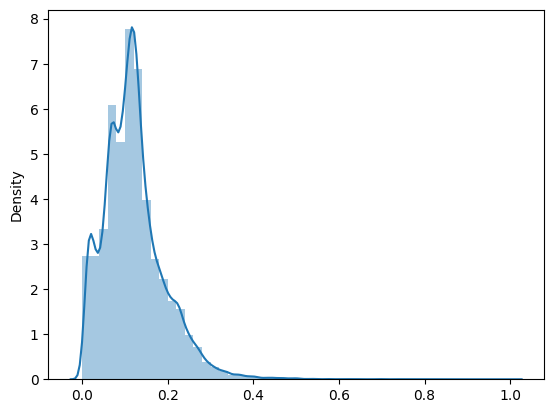

In [30]:
mms_model=preprocessing.MinMaxScaler()
mm_scaled_values=mms_model.fit_transform(data_frame[['fnlwgt']])
sns.distplot(mm_scaled_values);

In [31]:
mm_scaled_values

array([[0.0443019 ],
       [0.0482376 ],
       [0.13811345],
       ...,
       [0.09482688],
       [0.12849934],
       [0.18720338]])

In [32]:
import pickle
with open('fnlwgt_scale_values.pkl','wb') as file:
    pickle.dump(mms_model,file)

In [33]:
mml_log_values=np.log(mm_scaled_values+1)
mml_log_values

array([[0.04334862],
       [0.04711027],
       [0.12937202],
       ...,
       [0.09059625],
       [0.12088873],
       [0.17160044]])

In [34]:
ss_data=np.sqrt(np.sqrt(np.exp(pd.DataFrame(np.sqrt(mm_scaled_values))[0].sort_values())))
ss_data

17096    1.000000
27207    1.007968
25743    1.010546
24012    1.016804
10826    1.017298
           ...   
8258     1.254870
15569    1.259736
16739    1.270895
18138    1.280823
14449    1.284025
Name: 0, Length: 32561, dtype: float64

In [35]:
#From the EDA part, we go to know that log values of ss_data gives lesser count of outliers.

In [36]:
data_frame['fnlwgt']=np.sqrt(data_frame['fnlwgt'])

In [37]:
#Now, for age and hours-per-week columns, we gotta change them to log values to minimize outliers
data_frame['age']=np.log(data_frame['age'])
data_frame['hours-per-week']=np.log(data_frame['hours-per-week'])

In [38]:
def outliers(data,threshold=3):
    mean=data.mean()
    std=data.std()
    z_score=(data-mean)/std
    outliers=[value for index,value in enumerate(data) if value>=threshold]
    print('Outliers found: ',outliers)

In [39]:
in1=data_frame.drop(['salary'],axis=1)
#in1=data_frame.drop(['salary'],axis=1)
in1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,3.663562,7,278.416954,9,4,4,1,1,4,1,2174,0,3.688879,39
1,3.912023,6,288.636450,9,4,2,4,0,4,1,0,0,2.564949,39
2,3.637586,4,464.377002,11,15,0,6,1,4,1,0,0,3.688879,39
3,3.970292,4,484.480134,1,13,2,6,0,2,1,0,0,3.688879,39
4,3.332205,4,581.729318,9,4,2,10,5,2,0,0,0,3.688879,5


In [40]:
scaler=preprocessing.StandardScaler()
in1_scaled=pd.DataFrame(scaler.fit_transform(in1),columns=in1.columns)

In [41]:
with open('ss_scale_values.pkl','wb') as file:
    pickle.dump(scaler,file)

In [42]:
in1_scaled.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,0.205903,2.150579,-1.173869,-0.335437,-0.658598,0.921634,-1.317809,-0.277805,0.393668,0.703071,0.148453,-0.21666,0.128926,0.291569
1,0.895359,1.463736,-1.088463,-0.335437,-0.658598,-0.406212,-0.608387,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-2.611727,0.291569
2,0.133824,0.090050,0.380227,0.181332,1.215082,-1.734058,-0.135438,-0.277805,0.393668,0.703071,-0.145920,-0.21666,0.128926,0.291569
3,1.057050,0.090050,0.548231,-2.402511,0.874413,-0.406212,-0.135438,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,0.128926,0.291569
4,-0.713580,0.090050,1.360957,-0.335437,-0.658598,-0.406212,0.810458,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,0.128926,-4.054223


In [43]:
final_data=pd.concat([in1_scaled,data_frame[['salary']]],axis=1)

In [44]:
final_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,0.205903,2.150579,-1.173869,-0.335437,-0.658598,0.921634,-1.317809,-0.277805,0.393668,0.703071,0.148453,-0.21666,0.128926,0.291569,<=50K
1,0.895359,1.463736,-1.088463,-0.335437,-0.658598,-0.406212,-0.608387,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-2.611727,0.291569,<=50K
2,0.133824,0.090050,0.380227,0.181332,1.215082,-1.734058,-0.135438,-0.277805,0.393668,0.703071,-0.145920,-0.21666,0.128926,0.291569,<=50K
3,1.057050,0.090050,0.548231,-2.402511,0.874413,-0.406212,-0.135438,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,0.128926,0.291569,<=50K
4,-0.713580,0.090050,1.360957,-0.335437,-0.658598,-0.406212,0.810458,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,0.128926,-4.054223,<=50K


In [45]:
final_data.to_csv('final_data_all.csv',index=False)

In [46]:
final_data_copy=final_data.copy()
#data_frame[col],mapping=encoding(data_frame[col])
final_data_copy['salary'],_=encoding(data_frame['salary'])

In [47]:
final_data_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,0.205903,2.150579,-1.173869,-0.335437,-0.658598,0.921634,-1.317809,-0.277805,0.393668,0.703071,0.148453,-0.21666,0.128926,0.291569,0
1,0.895359,1.463736,-1.088463,-0.335437,-0.658598,-0.406212,-0.608387,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-2.611727,0.291569,0
2,0.133824,0.090050,0.380227,0.181332,1.215082,-1.734058,-0.135438,-0.277805,0.393668,0.703071,-0.145920,-0.21666,0.128926,0.291569,0
3,1.057050,0.090050,0.548231,-2.402511,0.874413,-0.406212,-0.135438,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,0.128926,0.291569,0
4,-0.713580,0.090050,1.360957,-0.335437,-0.658598,-0.406212,0.810458,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,0.128926,-4.054223,0


In [48]:
final_data_copy.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
age,1.000000,0.030570,-0.069261,0.010680,0.022068,-0.324955,-0.007285,-0.286551,0.021288,0.104632,0.081238,0.063277,0.106890,-0.007155,0.269104
workclass,0.030570,1.000000,-0.016588,0.023513,0.002932,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.136376,-0.007690,0.051604
fnlwgt,-0.069261,-0.016588,1.000000,-0.029054,0.017001,0.027999,0.002424,0.009809,-0.015225,0.024150,0.001801,-0.007887,-0.005146,-0.057434,-0.005899
education,0.010680,0.023513,-0.029054,1.000000,-0.362448,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.057562,0.064288,0.079317
education-num,0.022068,0.002932,0.017001,-0.362448,1.000000,0.005632,-0.037210,0.017110,-0.014524,0.033589,-0.037984,-0.029271,-0.013253,0.006119,-0.151933
marital-status,-0.324955,-0.064731,0.027999,-0.038407,0.005632,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.186112,-0.023819,-0.199307
occupation,-0.007285,0.254892,0.002424,-0.021260,-0.037210,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.074764,-0.012543,0.075468
relationship,-0.286551,-0.090461,0.009809,-0.010876,0.017110,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.218016,-0.005507,-0.250918
race,0.021288,0.049742,-0.015225,0.014131,-0.014524,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.023477,0.137852,0.071846
sex,0.104632,0.095981,0.024150,-0.027356,0.033589,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.201527,-0.008119,0.215980


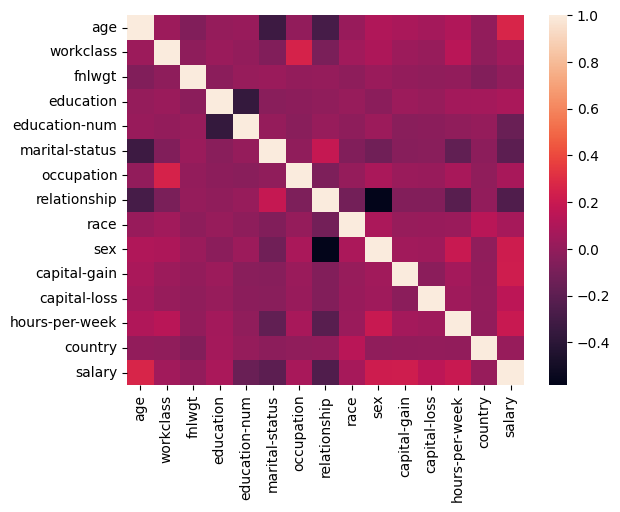

In [49]:
sns.heatmap(final_data_copy.corr());